**Importing and studying the data**

In [45]:
# importing the essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from urllib.parse import urlparse
import re

In [46]:
# defining the dataset
df = pd.read_csv("dataset_websites.csv")
df.head()

,url,status
0,http://www.crestonwood.com/router.php,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,phishing
2,https://support-appleld.com.secureupdate.duila...,phishing
3,http://rgipt.ac.in,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,legitimate


In [47]:
# checking if the dataset is having a null values
df.isnull().sum()

url       0
status    0
dtype: int64

In [48]:
# checking for the duplicate values
df.duplicated().sum()

np.int64(1)

In [49]:
df = df.drop_duplicates()

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11429 entries, 0 to 11429
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   url     11429 non-null  object
 1   status  11429 non-null  object
dtypes: object(2)
memory usage: 267.9+ KB


In [51]:
df.shape

(11429, 2)

In [52]:
# frequescy distribution of the target column
df["status"].value_counts()

status
legitimate    5715
phishing      5714
Name: count, dtype: int64

feature columns : the url are given. we can extract parameters like [] for our machine learning model to perform

target columns : the frequency distribution of the target column ["status"] is uniformed

**Here are some key parameters to consider:**

Length of URL: Longer URLs are often suspicious.

Number of Dots (.) in URL: More dots may indicate subdomains used in phishing.

Number of Hyphens (-): Phishing URLs often use hyphens to mimic legitimate ones.

Number of Special Characters (@, #, ?, &, =, $, %): Phishing URLs may contain unusual special characters.

Number of Subdomains: More subdomains (e.g., sub.sub.example.com) may indicate phishing.

Presence of HTTPS (http:// vs. https://): Secure sites use https://, but this alone isn’t a guarantee.

Ratio of Numbers to Letters: More numbers in a domain can be suspicious (e.g., bank123.com).

Length of URL Path: Longer paths can be suspicious (example.com/a/b/c/d/e).

number of double slash (//): The greater the value can be suspicious.

In [53]:
# lenth of url
df['url_len'] = df['url'].apply(len)

In [54]:
# number of dots in url
df['n_dots'] = df['url'].str.count(r'\.')

In [55]:
# number of hyphen in the url
df['n_hyphen'] = df['url'].str.count(r'-')

In [56]:
# number of special characters in the url
df['n_special_char'] = df['url'].str.count(r'[@#?&=$%*]')

In [57]:
# number of sub domains in the url
df['subdomain_count'] = df['url'].str.count(r'\.') - 1
df['subdomain_count'] = df['subdomain_count'].apply(lambda x: max(x, 0))

In [58]:
# presence of https://
df['has_https'] = df['url'].str.contains('https:', case=False, na=False)

In [59]:
# ratio numbers to letters
def ratio_numbers_to_letters(text):
    num_digits = sum(c.isdigit() for c in text)  # Count digits
    num_letters = sum(c.isalpha() for c in text)  # Count letters
    return num_digits / num_letters if num_letters > 0 else None  # Avoid division by zero

# using the defined function on the column
df['ratio_num_let'] = df['url'].apply(ratio_numbers_to_letters)

In [60]:
# Function to calculate the length of the URL path
def get_url_path_length(url):
    parsed_url = urlparse(url)  # Parse the URL
    path_segments = [segment for segment in parsed_url.path.split('/') if segment]  # Remove empty segments
    return len(path_segments)  # Count segments

# Apply function to DataFrame
df['pth_len'] = df['url'].apply(get_url_path_length)

In [61]:
df['number_of_doubleslash'] = df['url'].str.count('//') 

In [62]:
df.sample(10)

,url,status,url_len,n_dots,n_hyphen,n_special_char,subdomain_count,has_https,ratio_num_let,pth_len,number_of_doubleslash
9104,https://support-appleld.com.secureupdate.duila...,phishing,126,4,1,6,3,True,0.289157,2,1
3558,http://www.dlya-sebya.com/,legitimate,26,2,1,0,1,False,0.000000,0,1
1467,https://msdn.microsoft.com/en-us/library/windo...,legitimate,79,4,1,1,3,True,0.145455,5,1
7995,https://www.caraola.es/cmd-login=61cf5eb823263...,phishing,115,2,1,4,1,True,0.316456,1,1
9955,http://au.prize400.info/w.php?offer_id=140&aff...,phishing,73,3,0,8,2,False,0.447368,1,1
8429,http://www.schrockguide.net/,legitimate,28,2,0,0,1,False,0.000000,0,1
11278,https://www.damenperuecke.com/,legitimate,30,2,0,0,1,True,0.000000,0,1
7636,https://grim-4875933.app.link/,phishing,30,2,1,0,1,True,0.437500,0,1
8644,http://www.isitdownrightnow.com/update.microso...,legitimate,57,5,0,0,4,False,0.000000,1,1
9897,http://www.uk-schools.co.uk/uk/fair-furlong-pr...,legitimate,71,3,5,0,2,False,0.075472,3,1


In [63]:
df.info()
# 0. url needs to be dropped
# 7. has_https column needs to convernted in int

<class 'pandas.core.frame.DataFrame'>
Index: 11429 entries, 0 to 11429
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   url                    11429 non-null  object 
 1   status                 11429 non-null  object 
 2   url_len                11429 non-null  int64  
 3   n_dots                 11429 non-null  int64  
 4   n_hyphen               11429 non-null  int64  
 5   n_special_char         11429 non-null  int64  
 6   subdomain_count        11429 non-null  int64  
 7   has_https              11429 non-null  bool   
 8   ratio_num_let          11429 non-null  float64
 9   pth_len                11429 non-null  int64  
 10  number_of_doubleslash  11429 non-null  int64  
dtypes: bool(1), float64(1), int64(7), object(2)
memory usage: 993.3+ KB


In [64]:
# after extracting the features we are dropping the url column
df = df.drop(columns=['url'])

In [65]:
# replacing the target column as 1 and 0; phishing & legitimate
df['has_https'] = df['has_https'].replace({True: 1, False: 0})
df['status'] = df['status'].replace({"legitimate": 0, "phishing": 1})

C:\Users\abc\AppData\Local\Temp\ipykernel_13848\2083795811.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['has_https'] = df['has_https'].replace({True: 1, False: 0})
C:\Users\abc\AppData\Local\Temp\ipykernel_13848\2083795811.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['status'] = df['status'].replace({"legitimate": 0, "phishing": 1})


In [66]:
df.shape

(11429, 10)

In [67]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 11429 entries, 0 to 11429
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   status                 11429 non-null  int64  
 1   url_len                11429 non-null  int64  
 2   n_dots                 11429 non-null  int64  
 3   n_hyphen               11429 non-null  int64  
 4   n_special_char         11429 non-null  int64  
 5   subdomain_count        11429 non-null  int64  
 6   has_https              11429 non-null  int64  
 7   ratio_num_let          11429 non-null  float64
 8   pth_len                11429 non-null  int64  
 9   number_of_doubleslash  11429 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 982.2 KB


**Visuals**

In [68]:
# making a list of column names
columns = df.columns.tolist()

C:\Users\abc\AppData\Local\Temp\ipykernel_13848\1021938473.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="status", data=df, palette="coolwarm")


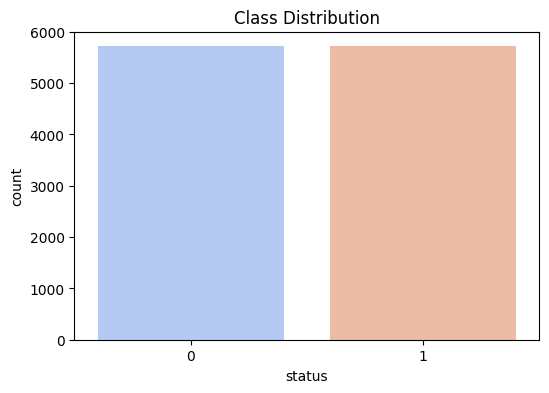

In [69]:
plt.figure(figsize=(6, 4))
sns.countplot(x="status", data=df, palette="coolwarm")
plt.title("Class Distribution")
plt.show()

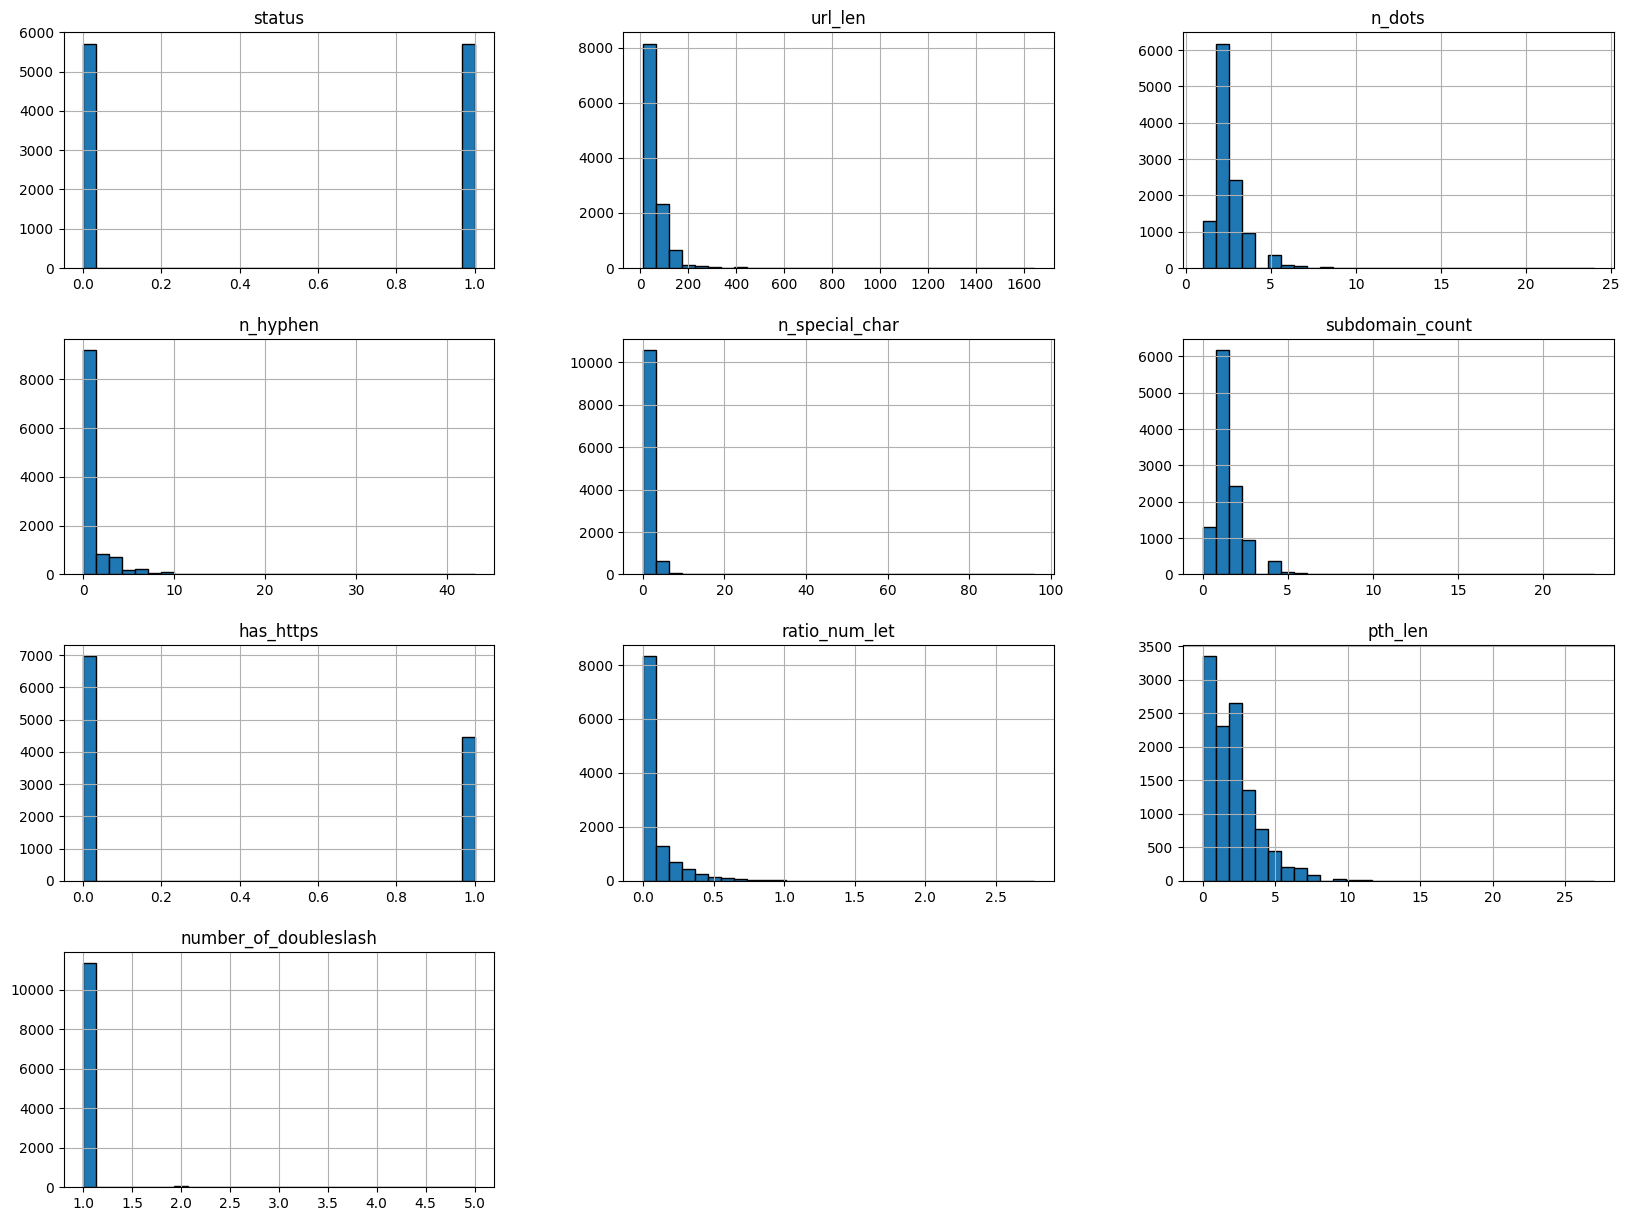

In [70]:
# Histograms of numerical features
df.hist(figsize=(20, 15), bins=30, edgecolor="black")
plt.show()

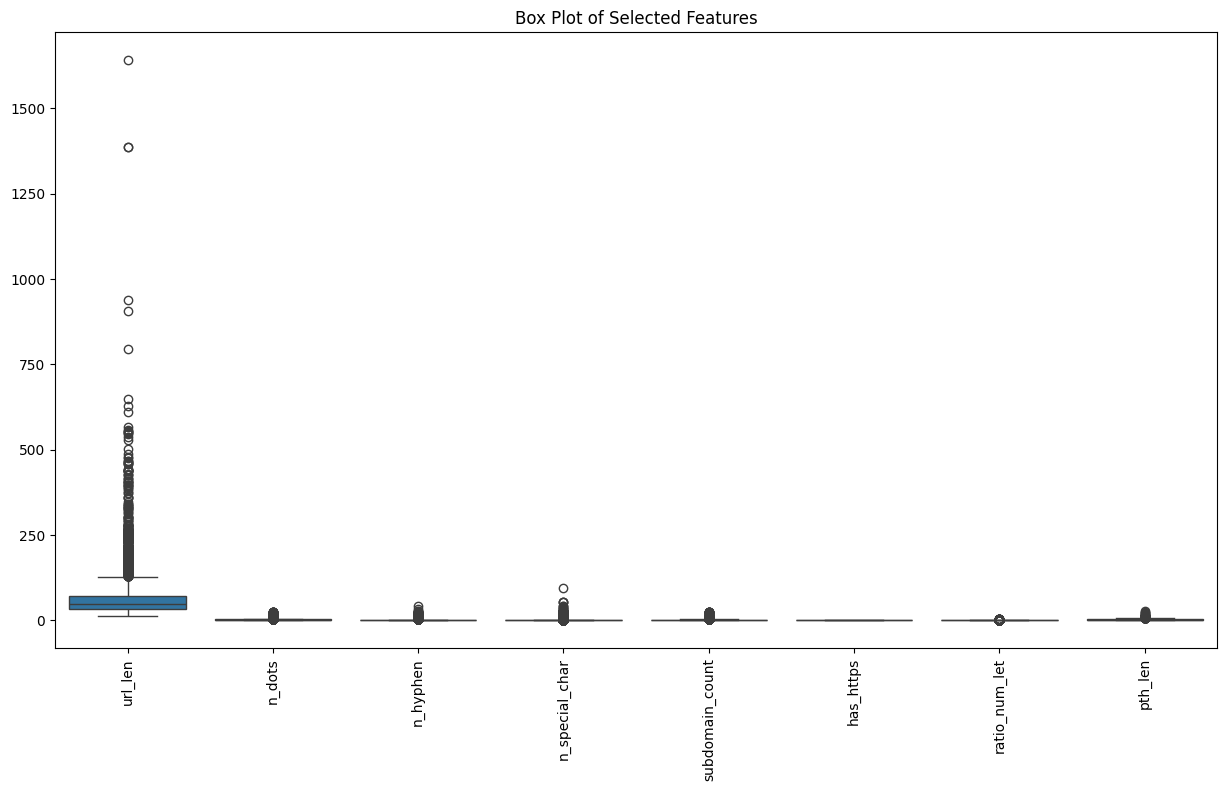

In [71]:
# Box plots to detect outliers
plt.figure(figsize=(15, 8))
sns.boxplot(data=df.iloc[:, 1:9])  # First 20 numerical features to avoid clutter
plt.xticks(rotation=90)
plt.title("Box Plot of Selected Features")
plt.show()

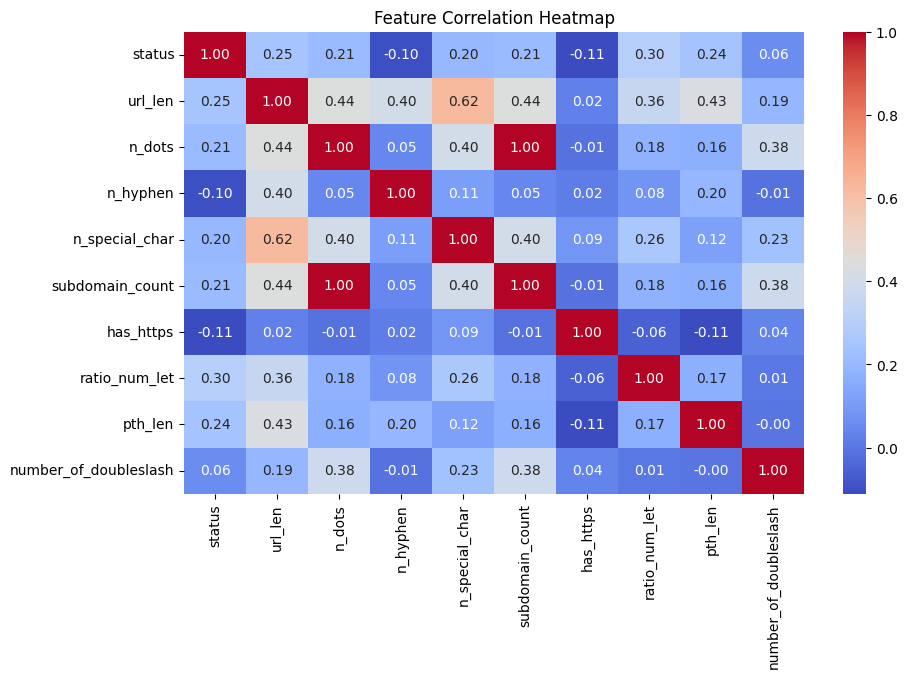

In [72]:
# Correlation Analysis
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

**Spliting the data**

In [73]:
# list of columns in feature dataset
X_columns = columns[1:]
X_columns

['url_len',
 'n_dots',
 'n_hyphen',
 'n_special_char',
 'subdomain_count',
 'has_https',
 'ratio_num_let',
 'pth_len',
 'number_of_doubleslash']

In [74]:
# setting the outliers of all the columns as their lower bound/upper bound
for i in X_columns:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[i] = df[i].clip(lower=lower_bound, upper=upper_bound)

In [75]:
# seprating the feature columns and predicted columns
X = df.drop("status",axis=1)
y = df["status"]

In [76]:
# spliting the data in training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [77]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((9143, 9), (2286, 9), (9143,), (2286,))

In [78]:
# scaling teh data using StandardScaler
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_s = ss.fit_transform(X_train)
X_test_s = ss.transform(X_test)

**XGBoost**

In [79]:
# applying XGBClassifier algorithm on the data
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [80]:
model = XGBClassifier()
model.fit(X_train_s, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [81]:
y_pred = model.predict(X_test_s)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.800524934383202


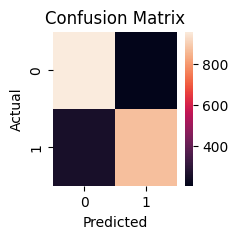

In [82]:
cm=confusion_matrix(y_test, y_pred)
plt.figure(figsize=(2,2))
sns.heatmap(cm)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

**Logistic regression**

In [83]:
# applying Logistic regression algorithm on the data
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_s, y_train)

LogisticRegression()

In [84]:
y_pred = model.predict(X_test_s)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7077865266841645


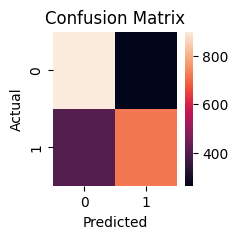

In [85]:
cm=confusion_matrix(y_test, y_pred)
plt.figure(figsize=(2,2))
sns.heatmap(cm)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

*
**We used two algorithm on our training set.**

*1. XGBoost which gave an accuracy of 80.05%*

*2. Logistic Regression which gave an accuracy of 70.77%*

**KNN**

In [108]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train_s, y_train)

KNeighborsClassifier()

In [109]:
y_pred = model.predict(X_test_s)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7847769028871391


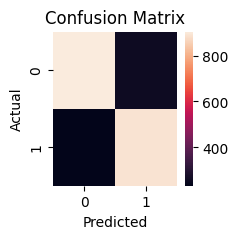

In [110]:
cm=confusion_matrix(y_test, y_pred)
plt.figure(figsize=(2,2))
sns.heatmap(cm)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [111]:
def extract_features(url):
    parsed_url = urlparse(url)

    # Extract Features from URL
    features = {
        "url_len": len(url),
        "n_dots": url.count("."),
        "n_hyphen": url.count("-"),
        "n_special_char": len(re.findall(r"[@#%&*?=$]", url)),  # Special characters 
        "subdomain_count": parsed_url.netloc.count("."),  # Number of subdomains
        "has_https": 1 if parsed_url.scheme == "https" else 0,  # HTTPS present
        "ratio_num_let": sum(c.isdigit() for c in url) / len(url),  # Ratio of digits
        "pth_len": len(parsed_url.path),  # Length of the path
        "number_of_doubleslash": url.count("//"),  # Number of "//" in the URL
    }

    return pd.DataFrame([features])  # Convert to DataFrame for model input

In [115]:
# Taking URL input from the user
user_url = input("Enter a URL: ")

# Extract features from the URL
user_features = extract_features(user_url)

# Scale features
user_features_s = ss.transform(user_features)

# Make prediction using the XGBoost model
prediction = model.predict(user_features_s)[0]

# Print result
if prediction == 1:
    print("This URL is likely PHISHING.")
else:
    print("This URL seems LEGITIMATE.")

Enter a URL:  https://www.google.playstore.com


This URL seems LEGITIMATE.
